In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
%config InlineBackend.figure_formats = {'png', 'retina'}
plt.rcParams['font.family'] = 'Yu Mincho'

In [3]:
csv_in = 'covid-19-pref-area-20200403.csv'
df = pd.read_csv(csv_in, delimiter=',', skiprows=7, header=0)
print(df.shape)
print(df.info())
display(df.head())

(47, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pref        47 non-null     object 
 1   Pop(100k)   47 non-null     float64
 2   Infected    47 non-null     int64  
 3   Discharged  47 non-null     int64  
 4   PCR         47 non-null     int64  
 5   Area        47 non-null     object 
dtypes: float64(1), int64(3), object(2)
memory usage: 2.3+ KB
None


,Pref,Pop(100k),Infected,Discharged,PCR,Area
0,Hokkaido,53.2,190,130,2803,Hokkaido
1,Aomori,12.8,11,0,249,Tohoku
2,Iwate,12.6,0,0,69,Tohoku
3,Miyagi,23.2,13,1,479,Tohoku
4,Akita,10.0,9,2,358,Tohoku


In [4]:
print(df.isnull().sum())
# display(df[df.isnull().any(axis=1) ])

Pref          0
Pop(100k)     0
Infected      0
Discharged    0
PCR           0
Area          0
dtype: int64


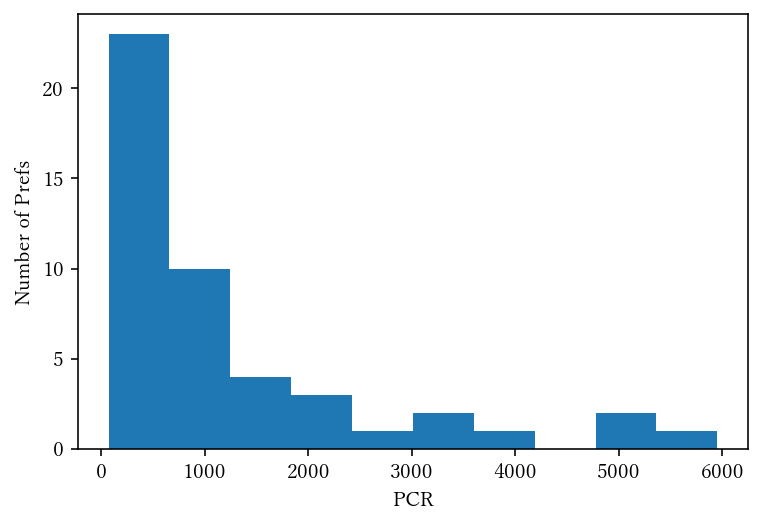

In [5]:
pcr = df['PCR']
plt.hist(pcr, bins=10)
plt.xlabel('PCR')
plt.ylabel('Number of Prefs')
plt.show()

,Infected,Discharged
0,190,130
1,11,0
2,0,0
3,13,1
4,9,2


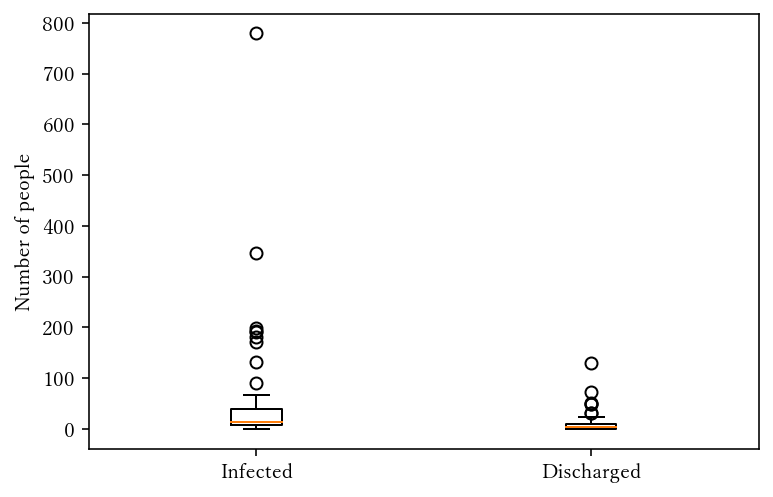

In [6]:
df_num = df.loc[:, 'Infected':'Discharged']
display(df_num.head())
plt.boxplot(np.array(df_num))
plt.xticks(range(1,df_num.shape[1]+1), df_num.columns)
plt.ylabel('Number of people')
plt.show()

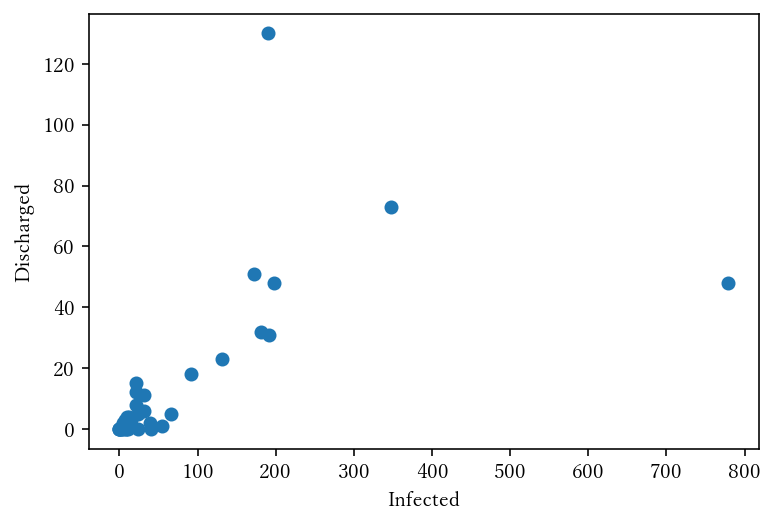

In [7]:
df_inf = df['Infected']
df_dis = df['Discharged']
plt.scatter(df_inf, df_dis, marker='o')
plt.xlabel('Infected')
plt.ylabel('Discharged')
plt.show()

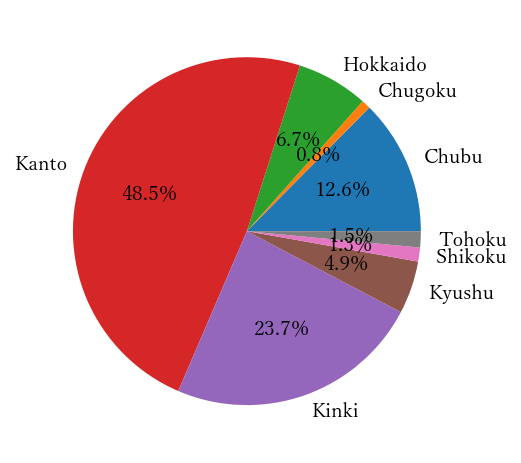

In [8]:
df_area = df.groupby('Area').sum()
plt.pie(df_area['Infected'], autopct="%.1f%%", labels=df_area.index)
plt.show()

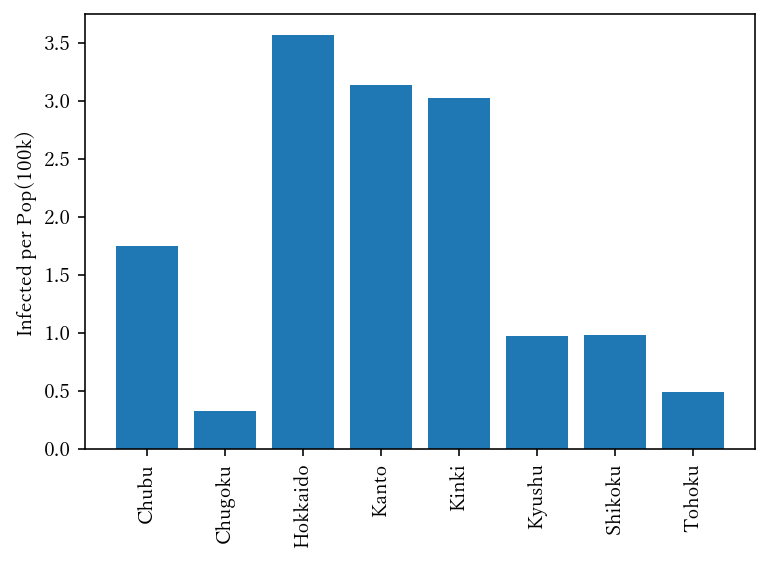

In [9]:
df_pop = df_area['Pop(100k)']
df_inf2 = df_area['Infected']
plt.bar(df_area.index, df_inf2/df_pop)
plt.ylabel('Infected per Pop(100k)')
plt.xticks(rotation=90)
plt.show()

In [10]:
df_jpn = pd.read_csv('covid-19-japan-20200407.csv', delimiter=',', skiprows=0, header=0)
df_jpn['Date'] = pd.to_datetime(df_jpn['Date'], format='%Y-%m-%d')
print(df_jpn.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          57 non-null     datetime64[ns]
 1   Infected_day  57 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.0 KB
None


(array([18300., 18307., 18314., 18322., 18329., 18336., 18343., 18353.,
        18360.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

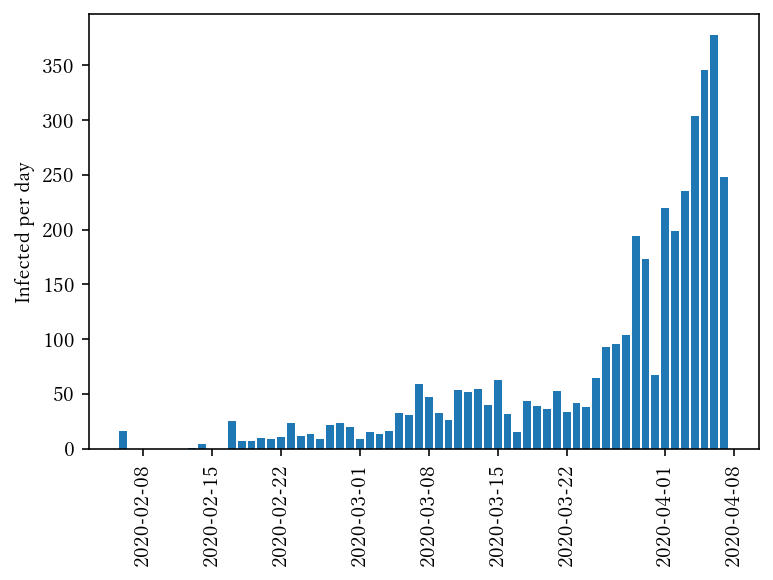

In [11]:
df_date = df_jpn['Date']
df_infdate = df_jpn['Infected_day']
plt.bar(df_date, df_infdate)
plt.ylabel('Infected per day')
plt.xticks(rotation=90)

(array([18307., 18314., 18322., 18329., 18336., 18343., 18353., 18360.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

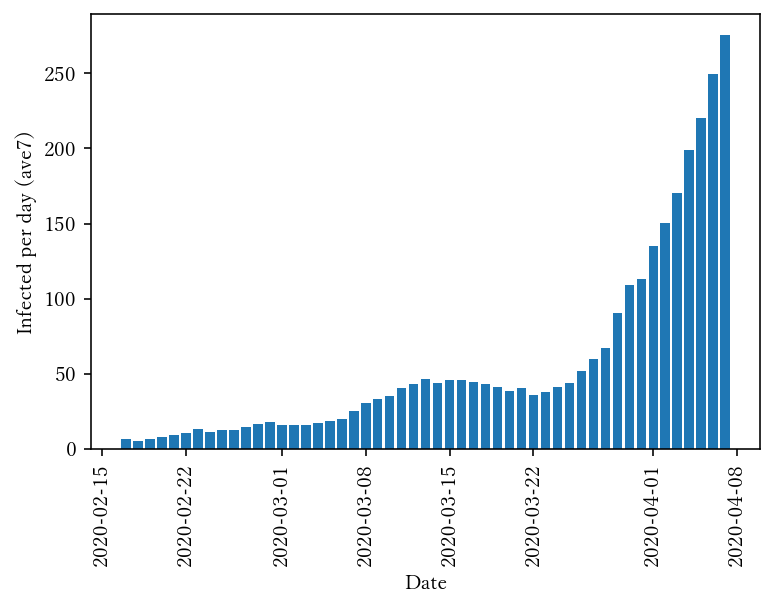

In [12]:
df_jpn['Infected_day_ave7'] = df_jpn.rolling(window=7).mean()
plt.bar(df_date, df_jpn['Infected_day_ave7'])
plt.xlabel('Date')
plt.ylabel('Infected per day (ave7)')
plt.xticks(rotation=90)

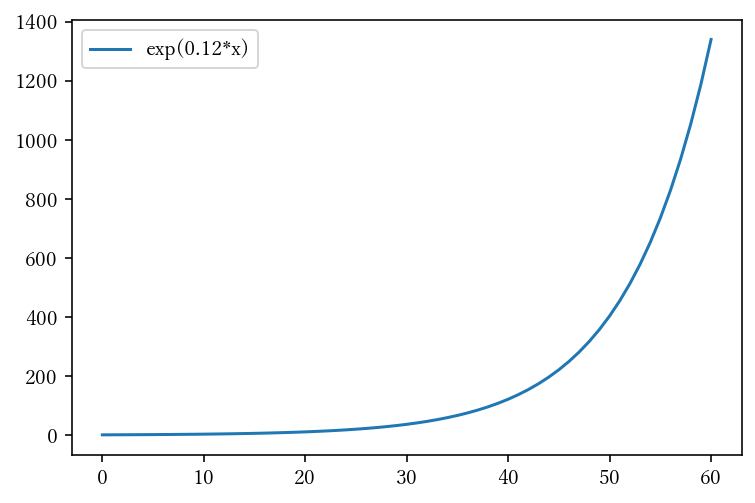

In [13]:
x = np.array(range(0,61))
y = np.exp(0.12*x)
plt.plot(x, y, label='exp(0.12*x)')
plt.legend()
plt.show()